In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel("Rotten_Tomatoes_Movies3.xls")
df.head(1)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0


In [5]:
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [7]:
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


Convert date to numeric (timestamps)

In [48]:
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'])
df['on_streaming_date'] = df['on_streaming_date'].astype('int64') // 10**9 

df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'])
df['in_theaters_date'] = df['in_theaters_date'].astype('int64') // 10**9  

Used the One Hot Encoding

In [9]:
categorical_columns=["movie_info","critics_consensus","genre","directors","writers","cast","studio_name"]
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0],inplace=True)
    
numeric_columns=["audience_rating","runtime_in_minutes","on_streaming_date","in_theaters_date"]
for columns in numeric_columns:
    df[columns].fillna(df[columns].median(),inplace=True)

In [10]:
df.isnull().sum()

movie_title           0
movie_info            0
critics_consensus     0
rating                0
genre                 0
directors             0
writers               0
cast                  0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
tomatometer_count     0
audience_rating       0
dtype: int64

See the Outliers with the help of histogram

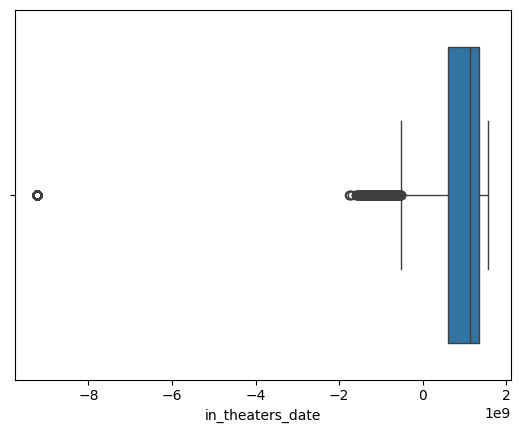

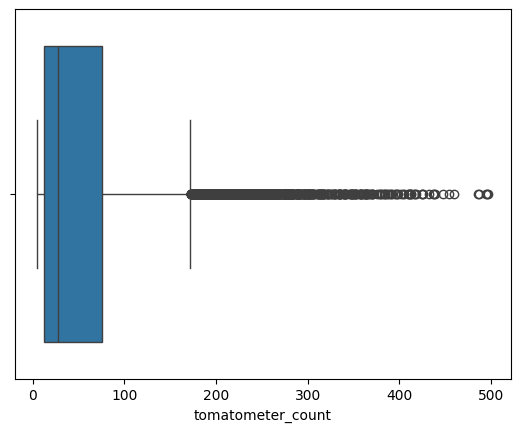

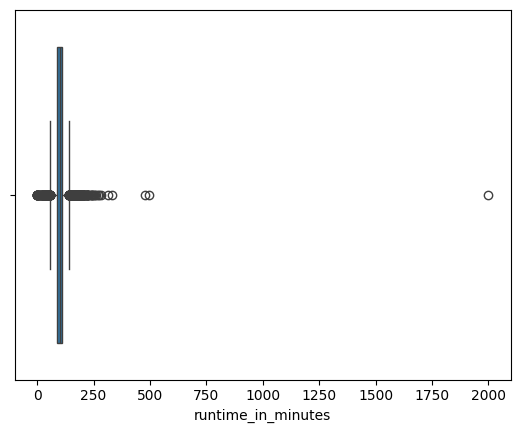

In [17]:
sns.boxplot(x="in_theaters_date",data=df)
plt.show()

sns.boxplot(x="tomatometer_count",data=df)
plt.show()

sns.boxplot(x="runtime_in_minutes",data=df)
plt.show()


Used the IQR method for removing the outliers

In [18]:
Q1_dictance=df["in_theaters_date"].quantile(0.25)
Q3_dictance=df["in_theaters_date"].quantile(0.75)
IQR=Q3_dictance-Q1_dictance

lower_bound=Q1_dictance-1.5*IQR
upper_bound=Q3_dictance+1.5*IQR

outliers=df[(df['in_theaters_date'] > upper_bound) | (df['in_theaters_date'] < lower_bound)]

In [19]:
Q1_dictance=df["tomatometer_count"].quantile(0.25)
Q3_dictance=df["tomatometer_count"].quantile(0.75)
IQR=Q3_dictance-Q1_dictance

lower_bound=Q1_dictance-1.5*IQR
upper_bound=Q3_dictance+1.5*IQR

outliers=df[(df['tomatometer_count'] > upper_bound) | (df['tomatometer_count'] < lower_bound)]

In [20]:
Q1_dictance=df["runtime_in_minutes"].quantile(0.25)
Q3_dictance=df["runtime_in_minutes"].quantile(0.75)
IQR=Q3_dictance-Q1_dictance

lower_bound=Q1_dictance-1.5*IQR
upper_bound=Q3_dictance+1.5*IQR

# outliers=df[df['runtime_in_minutes'] > upper_bound]
# outliers=df[(df['runtime_in_minutes'] < lower_bound)]
outliers = df[(df['runtime_in_minutes'] > upper_bound) | (df['runtime_in_minutes'] < lower_bound)]



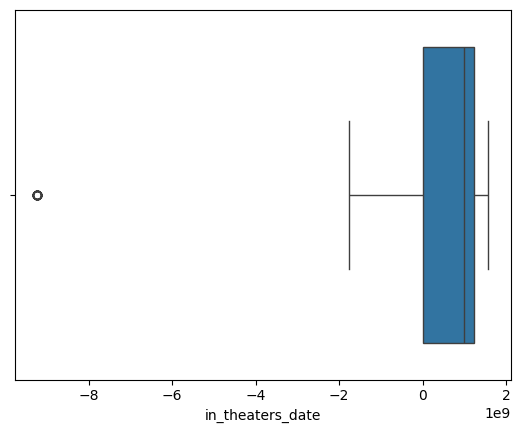

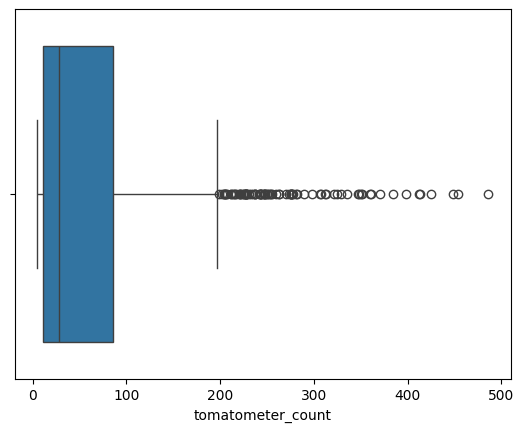

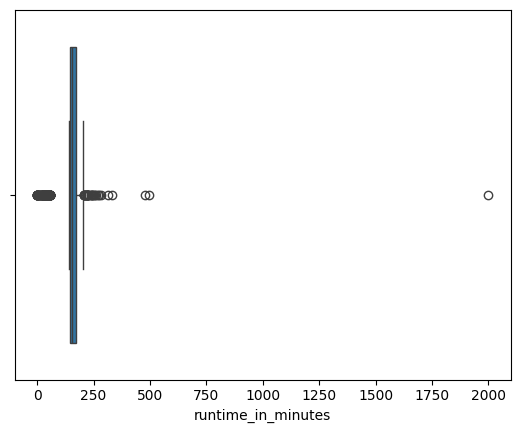

In [21]:
sns.boxplot(x="in_theaters_date",data=outliers)
plt.show()

sns.boxplot(x="tomatometer_count",data=outliers)
plt.show()

sns.boxplot(x="runtime_in_minutes",data=outliers)
plt.show()

Replaces outliers in the columns

In [22]:
df["in_theaters_date"]=df["in_theaters_date"].clip(lower=lower_bound,upper=upper_bound)
df["in_theaters_date"].describe()

count    16638.000000
mean       130.428597
std         29.467461
min         58.500000
25%        142.500000
50%        142.500000
75%        142.500000
max        142.500000
Name: in_theaters_date, dtype: float64

In [24]:
df["tomatometer_count"]=df["tomatometer_count"].clip(lower=lower_bound,upper=upper_bound)
df["tomatometer_count"].describe()

count    16638.000000
mean        75.255079
std         30.184801
min         58.500000
25%         58.500000
50%         58.500000
75%         76.000000
max        142.500000
Name: tomatometer_count, dtype: float64

In [23]:
df["runtime_in_minutes"]=df["runtime_in_minutes"].clip(lower=lower_bound,upper=upper_bound)
df["runtime_in_minutes"].describe()

count    16638.000000
mean       101.617833
std         16.559522
min         58.500000
25%         90.000000
50%         99.000000
75%        111.000000
max        142.500000
Name: runtime_in_minutes, dtype: float64

In [158]:
df['movie_title'].apply(str).value_counts()

movie_title
5623     5
5253     5
9984     4
4947     4
14315    4
        ..
12465    1
4081     1
4082     1
12466    1
16091    1
Name: count, Length: 16106, dtype: int64

In [159]:
df['rating'].apply(str).value_counts()


rating
R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: count, dtype: int64

In [177]:
df['tomatometer_status'].apply(str).value_counts()


tomatometer_status
2    7233
1    6448
0    2957
Name: count, dtype: int64

Used the Label Encoding

In [178]:
label_encoders={}

categorical_culomns=df.select_dtypes(include=["object"]).columns

for column in categorical_columns:
    org_values=df[column].unique()
    
    df[column] = df[column].astype(str)

    label_encoders[column]=LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [179]:
label_encoder = LabelEncoder()
df['rating'] = label_encoder.fit_transform(df['rating'])

In [193]:
x=df.iloc[:,:-1]
y=df["audience_rating"]

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Used the Regression algorithm for best predication

In [195]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

linear_mse=mean_squared_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)

print(f"mean squared error: {linear_mse}")
print(f"r2 score: {linear_r2}")

mean squared error: 219.99125093189028
r2 score: 0.46075444239351293


In [205]:
tree_model=DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=5)
tree_model.fit(x_train,y_train)

y_pred_tree=tree_model.predict(x_test)

tree_mse=mean_squared_error(y_test,y_pred_tree)
tree_r2=r2_score(y_test,y_pred_tree)

print(f"mean squared error: {tree_mse}")
print(f"r2 score: {tree_r2}")

mean squared error: 341.1224648046096
r2 score: 0.16383595726444655


In [203]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

y_pred_rf=rf_model.predict(x_test)

rf_mse=mean_squared_error(y_test,y_pred_rf)
rf_r2=r2_score(y_test,y_pred_rf)

print(f"mean squared error:{rf_mse}")
print(f"r2 score:{rf_r2}")

mean squared error:218.62556538461538
r2 score:0.4641020294513427


In [208]:
gb_model=GradientBoostingRegressor()
gb_model.fit(x_train, y_train)
y_pred_gb=gb_model.predict(x_test)

gb_mse=mean_squared_error(y_test,y_pred_gb)
gb_r2=r2_score(y_test,y_pred_gb)

print(f"mean squared error:{gb_mse}")
print(f"r2 score:{gb_r2}")


mean squared error:205.83362790906722
r2 score:0.4954578012270344


Scores of Mean Squared Error and R2 Score

In [210]:
models = [ 'Random Forest','Linear Regression','Decision Tree',"Gradient Boosting"]
mse_scores = [linear_mse,tree_mse,gb_mse,rf_mse]
r2_scores = [linear_r2,tree_r2,gb_r2,rf_r2]

results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_scores,
    'R^2 ': r2_scores
})
print(results_df)

               Model         MSE      R^2 
0      Random Forest  219.991251  0.460754
1  Linear Regression  341.122465  0.163836
2      Decision Tree  205.833628  0.495458
3  Gradient Boosting  218.625565  0.464102


Best Model for Prediction is Decision Tree:It has the lowest MSE and the highest R², meaning it is both accurate (low error) and has the best ability to explain the variance in the target (mall rating).